# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from joblib import dump

In [2]:
X_train = np.load('../data/X_train.npy')
X_train_all_indices = np.load('../data/X_train_all_indices.npy')
X_train_selected_indices = np.load('../data/X_train_selected_indices.npy')
y_train = np.load('../data/y_train.npy')

# Model Training

In [3]:
model = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 5, 10, 20, 50, 100],
    'min_samples_split': [2, 5, 10, 20, 50, 100],
    'min_samples_leaf': [1, 2, 5, 10, 20, 50, 100],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 756 candidates, totalling 3780 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20, 50, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 50, 100],
                         'min_samples_split': [2, 5, 10, 20, 50, 100]},
             scoring='neg_mean_absolute_error', verbose=1)

In [8]:
print(f"Best parameters: {grid_search.best_params_}")
model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=100)
model.fit(X_train, y_train)
dump(model, '../models/decision_tree_10_bands.joblib')

['../models/decision_tree_10_bands.joblib']

In [9]:
model_all_indices = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=100)
model_all_indices.fit(X_train_all_indices, y_train)
dump(model_all_indices, '../models/decision_tree_all_bands.joblib')

['../models/decision_tree_all_bands.joblib']

In [10]:
model_selected_indices = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=100)
model_selected_indices.fit(X_train_selected_indices, y_train)
dump(model_selected_indices, '../models/decision_tree_selected_bands.joblib')

['../models/decision_tree_selected_bands.joblib']

# Model Evaluation

In [11]:
X_test = np.load('../data/X_test.npy')
X_test_all_indices = np.load('../data/X_test_all_indices.npy')
X_test_selected_indices = np.load('../data/X_test_selected_indices.npy')
y_test = np.load('../data/y_test.npy')

In [12]:
y_pred = model.predict(X_test)
y_pred_all_indices = model_all_indices.predict(X_test_all_indices)
y_pred_selected_indices = model_selected_indices.predict(X_test_selected_indices)

In [13]:
results = pd.DataFrame(columns=['Model', 'MAE'])
results.loc[0] = ['DT', mean_absolute_error(y_test, y_pred)]
results.loc[1] = ['DTAllIndices', mean_absolute_error(y_test, y_pred_all_indices)]
results.loc[2] = ['DTSelectedIndices', mean_absolute_error(y_test, y_pred_selected_indices)]
results

,Model,MAE
0,DT,4.923267
1,DTAllIndices,4.849872
2,DTSelectedIndices,4.941433


## Visualization of True Labels vs. Predictions

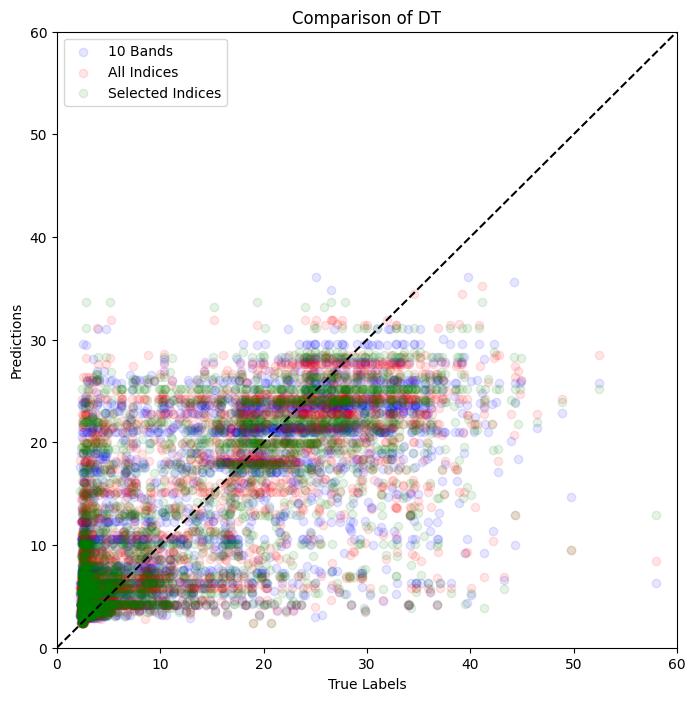

In [14]:
fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, color="blue", alpha=0.1, label="10 Bands")
plt.scatter(y_test, y_pred_all_indices, color="red", alpha=0.1, label="All Indices")
plt.scatter(y_test, y_pred_selected_indices, color="green", alpha=0.1, label="Selected Indices")
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("Comparison of DT")
plt.legend()

plt.show()